## **Question 1: Bandits and RL**

###1.What is the difference between A/B testing and Multi-armed bandits?

*  When we are talking about traffic to a website, A/B testing refers the method
whereby traffic is split 50:50 between two different pages. Hence, half of our users exactly would see ‘Page A’ and the others would see ‘Page B’. We then use the results to carry out our statistical tests.

*  In multi-armed bandit, for a small percentage of the time (generally 10%), we would split our traffic evenly between ‘Page A’ and ‘Page B’ just as we would do in A/B Testing. For the other 90% of the traffic, we would divert users to the best performing page.

*  As a result, a multi-bandit approach is usually applied for continuous optimization of existing pages, on the other hand A/B is best fitted for brand new pages that need experimentation analysis.

###2.What is the role of exploration in the Bandit problems?

* Exploration is defined when the gambler tests the machines/arms that aren’t currently paying out most to understand if they will pay out more; on the contrary, exploitation is when the gambler pulls the arm which is most profitable so far in hopes of maximizing total return. 

* Unlike in an A/B testing scenario (a purely exploratory design), the multi-armed bandit has both exploration and exploitation phases, which alternate in an adaptive manner based on the arms’ ongoing performance.

* The objective of multi-armed bandit algorithms is to determine the best choice among a set of options and then exploit it. To reach this goal, we must spend part of our time exploring the options, but also periodically exploit the best choice to decrease the amount of revenue in which we lost.
 


###3.What is the difference between the UCB and the Thompson sampling methods in terms of exploration?

* UCB follows the principle of optimism in the face of uncertainty which indicates that if we are uncertain about an action, we should optimistically assume that it is the correct action. According to the reward calculation in Upper Confidence Bound (UCB), the term $sqrt(2log(t)/s)$ allows us to do exploration in multi-bandit problems. The time complexity between the numerator and denominator provides a trade-off between exploration and exploitation. S represents the number of times action a is taken and t belongs to the number of trials passed. If s is small, we see that there is a large confidence interval (expected value of action based on kth arm is more uncertain). On the other hand, when s becomes large, there is a small confidence interval (expected value of action based on kth arm is more accurate).

* Based on Thompson sampling, it generates a bandit configuration (for example; a vector of expected rewards) from a posterior distribution. We will randomly sample from the posterior Beta distribution of each arm at each trial, and choose the arm which gives the max value for the next round. It applies "probability matching" which is an optimistic way in the face of uncertainty (uncertain actions have higher probability of being max). This allows us to balance between exploration and exploitation based on the individual posterior Beta distributions of each arm. Arms that are not explored as often as others will have a wider variance, which creates opportunities for it to be picked.



###4.How does the contextual setting differ from the non-contextual setting in terms of difficulty (be precise)?

* Unlike the non-contextual setting, the contextual setting incorporates the context information for the decision model. However, with the same context, there are not many future observations as the current observation. The context of the current observation is used to estimate a different context in future observations. Therefore, the performance of contextual  bandit can be sensitive to the estimation method of the outcome model or the exploration method used. 

* Also, bias is high in the initial phases because the samples are small and/or 
too complicated for estimation. Bias can also arise from the training samples where regions are different. Furthermore, each bandit will have different reward probabilities for each arm. This leads to the need of learning to condition its action on the state of the environment. 

* With contextual settings, models may become more complicated than non contextual settings even though the contextual setting will provide more precise predictions with less variance results. For non-contextual settings, there are no informed actions because of the lack of the state of the environment, thus, increasing the variance of testing models. 


###5.Can bandit algorithms be used for contextual bandits setting? If so, what is the disadvantage?

*  Yes, With contextual bandit, a learning algorithm can test out different 
actions and automatically learn which one has the most rewarding outcome for a given situation (guide our decision making process). With context, we can perform customization to each user in several applications. (which pages clicked or ads liked)

*  Existing learning methods for contextual bandit problems have one of two drawbacks: they either do not explore the space of all possible document rankings (i.e., actions) (because of time complexity; not enough time to explore); hence, may miss the optimal ranking, or they present sub-optimal rankings to a user and, thus, may harm the user experience.

###6.What is the difference between a Markov Reward Process and a Markov Decision Process? Can Bellman Expectation Equation be applied to both?

*   The Markov decision process involves making decisions, while a Markov reward process does not. We can say that the Markov decision process is a Markov reward process with decisions (add actions that influences state transition). "Bellman Expectation" equation can be applied to 
Markov Decision Process, and Markov Reward Process to express the long-term value of state s.


###7.What is the difference between supervised learning and reinforcement learning?

*  Supervised learning utilizes a dataset that has features and labels. You can utilize the models for supervised learning to predict the labels given the feature values. On the other hand, reinforcement learning doesn’t learn from a dataset, but instead it learns from the rewards that come with certain actions that an agent takes. Each action is associated with a certain reward, and the model can use this information to determine the best actions in the future.

*  The learning process in supervised learning is passive since the model learns a mapping from input to output, without altering the input space as a consequence of its learning. In reinforcement learning, the learning process is active  and its fundamental idea is that the agent learns by interacting with its environment via changing the environment in which it observes.

###8.How are simulations used in a forward search? (i.e., in a simple Monte Carlo search)

*  For the forward search, the tree is much too large for us to learn the entire thing. There are far too many potential future states to learn them all.
Instead, we can simulate a few sequences of events in order to see what the outcome of the sequence is. This can be helpful to learn which actions are useful. We will prefer the action that is more promising based on the simulations that we conducted. 

--------------------

## **Question 2: Bandits**

###1.Write a function that responds with a stochastically generated reward given the arm index as an input. We will use it to test the performance of various algorithms next.

We wrote "test_algorithm" function to simulate the process. There are two main parameters as follows of:

* **num_sims**: Represents the number of independent simulations, each of length equal to 'horizon'.
* **horizon**: Represents the number of time steps/trials per round of simulation.

In [ ]:
def test_perform(algo, arms, num_sims, horizon):
    
    # Initialise variables for duration of accumulated simulation (num_sims * horizon_per_simulation)
    chosen_arms = [0.0 for i in range(num_sims * horizon)]
    rewards = [0.0 for i in range(num_sims * horizon)]
    cumulative_rewards = [0 for i in range(num_sims * horizon)]
    sim_nums = [0.0 for i in range(num_sims *horizon)]
    times = [0.0 for i in range (num_sims*horizon)]
    
    for sim in range(num_sims):
        sim = sim + 1
        algo.initialize(len(arms))
        
        for t in range(horizon):
            t = t + 1
            index = (sim -1) * horizon + t -1
            sim_nums[index] = sim
            times[index] = t
            
            # Selection of best arm and engaging it
            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm
            
            # Engage chosen Bernoulli Arm and obtain reward info
            reward = arms[chosen_arm].draw()
            rewards[index] = reward
            
            if t ==1:
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[index-1] + reward
                
            algo.update(chosen_arm, reward)
    
    return [sim_nums, times, chosen_arms, rewards, cumulative_rewards]

###2.Write individual functions for epsilon-greedy, UCB1 (informally also referred to as UCB) and Thompson sampling (use Beta-Bernoulli conjugacy) from scratch.

In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

####2.1- Epsilon Greedy

Epsilon Greedy is one of the fundamental methods in multi bandit problems and "epsilon" parameter indicates the percentage of trials dedicated for exploration.

* Counts: Represent recorded times when arm was pulled.

* Values: Represent the known mean reward. In the case of a Bernoulli arm, values points out the probability of reward which ranges from 0 to 1.

In [ ]:
class EpsilonGreedy(): # create Epsilon Greedy class
    def __init__(self, epsilon, counts, values):
        self.epsilon = epsilon
        # Count represent counts of pulls for each arm. For multiple arms, this will be a list of counts.
        self.counts = counts 
        # Value represent average reward for specific arm. For multiple arms, this will be a list of values.
        self.values = values 
        return 
    
    # Initialization: k number of arms
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return
    
    # Epsilon greedy arm selection
    def select_arm(self):
        # If prob is not in epsilon, do exploitation of best arm so far
        if random.random() > self.epsilon:
            return np.argmax(self.values)
        # If prob falls in epsilon range, do exploration
        else:
            return random.randrange(len(self.values))
    
    # Make updates on chosen arm and reward
    def update(self, chosen_arm, reward):
        # update counts pulled for chosen arm
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        
        # Update average/mean value/reward for chosen arm
        value = self.values[chosen_arm]
        new_value = ((n-1)/float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

We used a Bernoulli distribution to show the reward function of each arm in multi bandit problem.

In [ ]:
class Bernoulli():
    def __init__(self, p):
        self.p = p
    
    # Reward system based on Bernoulli Distribution
    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0   

*  There are 5 arms in the problem, four of them have average reward of 0.1, and the last one has average reward of 0.9.

* Epsilon Greedy algorithm does have epsilon hyperparameter defined as ranging from 0.2 to 0.6 and then we ran 3000 independent simulations.

* We executed 3000 independent simulations since we wanted to evaluate the average performance. The reasons why we did multiple times is that each simulation may be subject to the stochastic nature and performances may be skewed because of randomization. 

In [ ]:
# Set a seed for reproducibility
random.seed(5)

# out of 5 arms, 1 arm is clearly the best
means = [0.1, 0.1, 0.1, 0.1, 0.9] # initialization
n_arms = len(means) # take length of the array

# Shuffling arms in multi bandit problems
random.shuffle(means)

# Create list of Bernoulli with Reward Information
arms = list(map(lambda mu: Bernoulli(mu), means)) 
print("Simulation Result: Best arm in multi-bandit problem is " + str(np.argmax(means))) # print the result

f = open("standard_results_epsg.tsv", "w+")

all_epsilon={}
# Create simulations for each exploration epsilon value
for epsilon in [0.2, 0.3, 0.4, 0.5, 0.6]: # try different epsilon values
    algo = EpsilonGreedy(epsilon, [], [])
    algo.initialize(n_arms)
    results = test_perform(algo, arms, 3000, 250) # execute the function defined first part
    all_epsilon[epsilon]=results
    # Record data
    for i in range(len(results[0])):
        f.write(str(epsilon) + "\t")
        f.write("\t".join([str(results[j][i]) for j in range(len(results))]) + "\n")
f.close()

Simulation Result: Best arm in multi-bandit problem is 4


####2.2- Upper Confidence Bound (UCB1)

The UCB algorithm concerned with the upper bound, given that we are trying to find the arm with the highest reward rate. In the light of this idea, we created class object to implement it. (initalization, arm selection based on reward, updates of average reward for each arm)

* **Counts**: Represent recorded times when arm was pulled.
* **Values**: Represent the known mean reward. In the case of a Bernoulli arm, values represent the probability of reward which ranges from 0 to 1.

In [ ]:
class UCB1(): # create UCB1 class
    def __init__(self, counts, values):
        # Count represent counts of pulls for each arm (For multiple arms, this will be a list of counts)
        self.counts = counts 
        # Value represent average reward for specific arm (For multiple arms, this will be a list of values)
        self.values = values 
        return

    # Initialization: k number of arms
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return
    
    # UCB arm selection (max of UCB reward of each arm)
    def select_arm(self):
        n_arms = len(self.counts)
        for arm in range(n_arms):
            if self.counts[arm] == 0:
                return arm
    
        ucb_values = [0.0 for arm in range(n_arms)]
        total_counts = sum(self.counts)
        
        for arm in range(n_arms):
            bonus = math.sqrt((2 * math.log(total_counts)) / float(self.counts[arm]))
            ucb_values[arm] = self.values[arm] + bonus
        return ucb_values.index(max(ucb_values))
    
    # Make updates on selected arm and reward
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        
        # Update mean value of reward for chosen arm
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

We used a Bernoulli distribution to show the reward function of each arm in multi bandit problem.

In [ ]:
class Bernoulli():
    def __init__(self, p):
        self.p = p
    
    # Reward system on the basis of Bernoulli Distribution
    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0

*  There are 5 arms in the problem, four of them have average reward of 0.1, and the last one has average reward of 0.9.

* UCB algorithm does not have any hyperparameter and then we ran 3000 independent simulations.

* We executed 3000 independent simulations since we wanted to evaluate the average performance. The one of the reason why we did multiple times is that performances may be skewed because of randomization.

In [ ]:
# set a seed for reproducibility
random.seed(5)

# out of 5 arms, 1 arm is clearly the best
means = [0.1, 0.1, 0.1, 0.1, 0.9] # initalization
n_arms = len(means) # take length of array

# Shuffling arms in multi bandit problems
random.shuffle(means)

# Create list of Bernoulli Arms with Reward Information
arms = list(map(lambda mu: Bernoulli(mu), means)) 
print("Simulation Result: Best arm in multi-bandit problem is " + str(np.argmax(means))) # print result
f = open("standard_ucb_results.tsv", "w+")

# Create 5 rounds of 3000 simulations
results_UCB={}
for x in range(0,5):
    algo = UCB1([], [])
    algo.initialize(n_arms)
    results = test_perform(algo, arms, 3000, 250)
    results_UCB[x] = results
    
# Record data
    for i in range(len(results[0])):
        f.write(str(x) + "\t")
        f.write("\t".join([str(results[j][i]) for j in range(len(results))]) + "\n")
f.close()

Simulation Result: Best arm in multi-bandit problem is 4


####2.3- Thompson Sampling

The Thompson Sampling algorithm takes advantage of  a Bayesian probabilistic approach to modeling the reward distribution of the various arms in multi bandit problem. Our assumption is that we used beta distribution for each arm based on its prior parameters and history. There are parameters for Thompson class object as follows of:

* **Counts**: Show recorded times when arm was pulled.

* **Values**: Demonstrates the known mean reward. Values represent the probability of reward which ranges from 0 to 1 in the case of a Bernoulli arm in multi bandit problem.


In [ ]:
from scipy.stats import beta

class Thompson(): # create Thompson sampling class
    def __init__(self, counts, values, a, b):
        # Count represent counts of pulls for each arm. For multiple arms, this will be a list of counts.
        self.counts = counts 
        # Value represent average reward for specific arm. For multiple arms, this will be a list of values.
        self.values = values 

        # Beta parameters
        self.a = a
        self.b = b
        return

    # Initialization: k number of arms
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]

        # Uniform distribution of prior beta (A,B)
        self.a = [1 for arm in range(n_arms)]
        self.b = [1 for arm in range(n_arms)]
        return
    
    # Thompson model selection of arm for each round
    def select_arm(self):
        n_arms = len(self.counts)
        
        # Pair up all beta params of a and b for each arm
        beta_params = zip(self.a, self.b)
        
        # Perform random draw for all arms based on their params (a,b)
        all_draws = [beta.rvs(i[0], i[1], size = 1) for i in beta_params]
        
        # return index of arm with the highest draw
        return all_draws.index(max(all_draws))
    
    # Make updates on chosen arm and reward
    def update(self, chosen_arm, reward):
        # update counts pulled for chosen arm
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        
        # Update mean of reward for chosen arm
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        
        # Modify a and b 
        
        # a is based on total counts of rewards of arm
        self.a[chosen_arm] = self.a[chosen_arm] + reward
        
        # b is based on total counts of failed rewards on arm
        self.b[chosen_arm] = self.b[chosen_arm] + (1-reward)
        
        return

We used a Bernoulli distribution to show the reward function of each arm in multi bandit problem.

In [ ]:
class BernoulliArm():
    def __init__(self, p):
        self.p = p
    
    # Reward system based on Bernoulli
    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0

*  There are 5 arms in the problem, four of them have average reward of 0.1, and the last one has average reward of 0.9.

* Thompson Sampling algorithm does not have any hyperparameter, there is only one assumption (beta(1,1) prior distribution) and then we ran 3000 independent simulations.

* We executed 3000 independent simulations since we wanted to evaluate the average performance. The one of the reason why we did multiple times is that performances may be skewed because of randomization.

In [ ]:
# set a seed for reproducibility
random.seed(5)

# out of 5 arms, 1 arm is clearly the best
means = [0.1, 0.1, 0.1, 0.1, 0.9] # initialization of mean rewards
n_arms = len(means) # take a length of the array
# Shuffling arms
random.shuffle(means)

# Build list of Bernoulli Arms with Reward Information
arms = list(map(lambda mu: BernoulliArm(mu), means))
print("Simulation Result: Best arm in multi-bandit problem is " + str(np.argmax(means)))

f = open("standard_ts_results.tsv", "w+")

# Run 5 simulations for Thompson Sampling
results_Thompson={}
for x in range(0,5):
    algo = Thompson([], [], [], [])
    algo.initialize(n_arms)
    results = test_perform(algo, arms, 3000, 250) # run it
    results_Thompson[x] = results
    
# Record data
    for i in range(len(results[0])):
        f.write(str(x) + "\t")
        f.write("\t".join([str(results[j][i]) for j in range(len(results))]) + "\n")
f.close()

Simulation Result: Best arm in multi-bandit problem is 4


###3.For various choices of ε, show how epsilon-greedy performs in terms of cumulative expected regret and in terms of arm selection.

To evaluate various choices of ε (starting from 0.2 to 0.6), we firstly recorded results of each simulation and then computed mean rate of choosing best arm in terms of arm selection.

In [ ]:
# creata separate dataframe for each epsilon simulation
df_1 = pd.DataFrame({'sim':all_epsilon[0.2][0],'time':all_epsilon[0.2][1],'arm_result':all_epsilon[0.2][2]})
df_2 = pd.DataFrame({'sim':all_epsilon[0.3][0],'time':all_epsilon[0.3][1],'arm_result':all_epsilon[0.3][2]})
df_3 = pd.DataFrame({'sim':all_epsilon[0.4][0],'time':all_epsilon[0.4][1],'arm_result':all_epsilon[0.4][2]})
df_4 = pd.DataFrame({'sim':all_epsilon[0.5][0],'time':all_epsilon[0.5][1],'arm_result':all_epsilon[0.5][2]})
df_5 = pd.DataFrame({'sim':all_epsilon[0.6][0],'time':all_epsilon[0.6][1],'arm_result':all_epsilon[0.6][2]})

In [ ]:
def countfunc(x):
  count=0
  for item in x:
    if item==4:
      count=count+1
  return count

We calculated percent of choosing best arm by considering arm selection results.

In [ ]:
# calculate percent of best arm 
df_n1=df_1.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)
df_n2=df_2.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)
df_n3=df_3.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)
df_n4=df_4.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)
df_n5=df_5.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)

df_n1=df_n1.reset_index()
df_n2=df_n2.reset_index()
df_n3=df_n3.reset_index()
df_n4=df_n4.reset_index()
df_n5=df_n5.reset_index()

The plot below indicates mean rate of selecting best arm in terms of arm selection. The model with lower epsilon value has higher mean rate of choosing best arm in terms of arm selection.

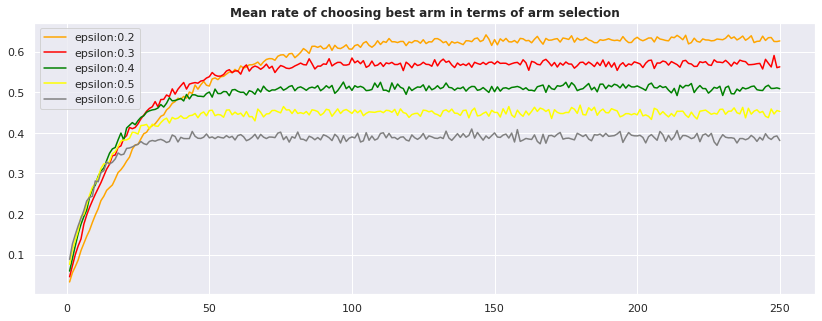

In [ ]:
#plot the percent of each epsilon simulation
import seaborn as sns
sns.set()
plt.figure(figsize=(14,5))
plt.plot(df_n1['time'],df_n1[0],color='orange',label='epsilon:0.2')
plt.plot(df_n2['time'],df_n2[0],color='red',label='epsilon:0.3')
plt.plot(df_n3['time'],df_n3[0],color='green',label='epsilon:0.4')
plt.plot(df_n4['time'],df_n4[0],color='yellow',label='epsilon:0.5')
plt.plot(df_n5['time'],df_n5[0],color='gray',label='epsilon:0.6')
plt.legend()
plt.title('Mean rate of choosing best arm in terms of arm selection',fontsize=12,weight='bold')
plt.show()

Then, we took cumulative reward from results table and calculated expected cumulative regret to evaluate performance.

In [ ]:
# take cumulative reward of each simulation
df_1['cumulative_reward'] = all_epsilon[0.2][4]
df_2['cumulative_reward'] = all_epsilon[0.3][4]
df_3['cumulative_reward'] = all_epsilon[0.4][4]
df_4['cumulative_reward'] = all_epsilon[0.5][4]
df_5['cumulative_reward'] = all_epsilon[0.6][4]

# compute max reward
df_1['max_reward']=df_1['time']*0.9
df_2['max_reward']=df_2['time']*0.9
df_3['max_reward']=df_3['time']*0.9
df_4['max_reward']=df_4['time']*0.9
df_5['max_reward']=df_5['time']*0.9

# compute cumulative regret for each result
df_1['cumulative_regret']=df_1['max_reward']-df_1['cumulative_reward']
df_2['cumulative_regret']=df_2['max_reward']-df_2['cumulative_reward']
df_3['cumulative_regret']=df_3['max_reward']-df_3['cumulative_reward']
df_4['cumulative_regret']=df_4['max_reward']-df_4['cumulative_reward']
df_5['cumulative_regret']=df_5['max_reward']-df_5['cumulative_reward']

# compute average of cumulative regret by using groupby
df_1 = df_1.groupby(['time'])['cumulative_regret'].mean()
df_2 = df_2.groupby(['time'])['cumulative_regret'].mean()
df_3 = df_3.groupby(['time'])['cumulative_regret'].mean()
df_4 = df_4.groupby(['time'])['cumulative_regret'].mean()
df_5 = df_5.groupby(['time'])['cumulative_regret'].mean()

# take reset_index to get time component
df_1 = df_1.reset_index()
df_2 = df_2.reset_index()
df_3 = df_3.reset_index()
df_4 = df_4.reset_index()
df_5 = df_5.reset_index()

Then, we plotted cumulative expected regret of each simulation over time. It can be clearly seen that the model with higher epsilon value had bigger cumulative expected regret value.

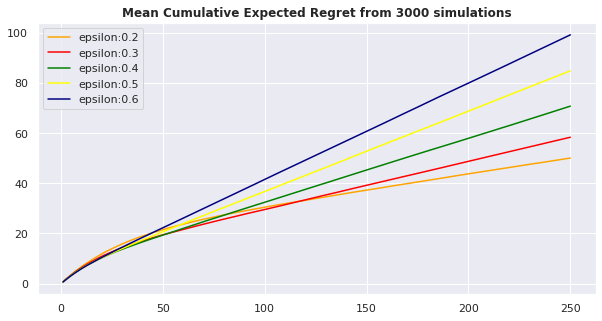

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,5))
plt.plot(df_1['time'],df_1['cumulative_regret'],color='orange',label='epsilon:0.2')
plt.plot(df_2['time'],df_2['cumulative_regret'],color='red',label='epsilon:0.3')
plt.plot(df_3['time'],df_3['cumulative_regret'],color='green',label='epsilon:0.4')
plt.plot(df_4['time'],df_4['cumulative_regret'],color='yellow',label='epsilon:0.5')
plt.plot(df_5['time'],df_5['cumulative_regret'],color='navy',label='epsilon:0.6')
plt.legend()
plt.title('Mean Cumulative Expected Regret from 3000 simulations',fontsize=12,weight='bold')
plt.show()

###4.Plot multiple simulations of the performance of UCB1 algorithm.

We ran 5 trials of the UCB1 algorithm and generated the same plots as in the Epsilon-Greedy algorithms. 

In [ ]:
df_1 = pd.DataFrame({'sim':results_UCB[0][0],'time':results_UCB[0][1],'arm_result':results_UCB[0][2]})
df_2 = pd.DataFrame({'sim':results_UCB[1][0],'time':results_UCB[1][1],'arm_result':results_UCB[1][2]})
df_3 = pd.DataFrame({'sim':results_UCB[2][0],'time':results_UCB[2][1],'arm_result':results_UCB[2][2]})
df_4 = pd.DataFrame({'sim':results_UCB[3][0],'time':results_UCB[3][1],'arm_result':results_UCB[3][2]})
df_5 = pd.DataFrame({'sim':results_UCB[4][0],'time':results_UCB[4][1],'arm_result':results_UCB[4][2]})

In [ ]:
# calculate percent of best arm 
df_n1=df_1.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)
df_n2=df_2.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)
df_n3=df_3.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)
df_n4=df_4.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)
df_n5=df_5.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)

df_n1=df_n1.reset_index()
df_n2=df_n2.reset_index()
df_n3=df_n3.reset_index()
df_n4=df_n4.reset_index()
df_n5=df_n5.reset_index()

The following plot demonstrates the mean rate of selecting the best arm for the 5 trials of the UCB1 algorithm. In the first 40 simulations, there has been higher fluctuation on mean rate of selecting best arms.

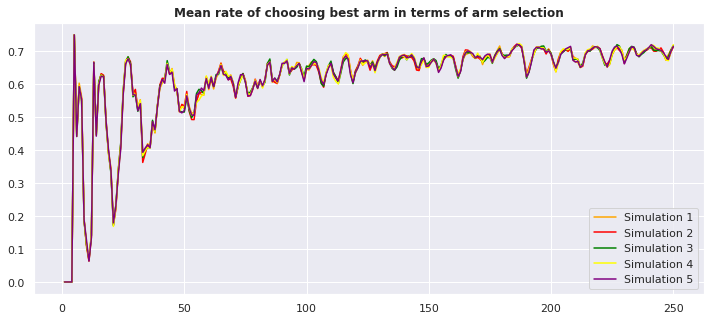

In [ ]:
#plot the percent of each epsilon simulation
sns.set()
plt.figure(figsize=(12,5))
plt.plot(df_n1['time'],df_n1[0],color='orange',label='Simulation 1')
plt.plot(df_n2['time'],df_n2[0],color='red',label='Simulation 2')
plt.plot(df_n3['time'],df_n3[0],color='green',label='Simulation 3')
plt.plot(df_n4['time'],df_n4[0],color='yellow',label='Simulation 4')
plt.plot(df_n5['time'],df_n5[0],color='purple',label='Simulation 5')
plt.legend()
plt.title('Mean rate of choosing best arm in terms of arm selection',fontsize=12,weight='bold')
plt.show()

To plot expected cumulative regret of each UCB1 simulation, we computed cumulative reward and maximum reward. Then, we calculated expected cumulative regret for each simulation.

In [ ]:
df_1['cumulative_reward'] = results_UCB[0][4]
df_2['cumulative_reward'] = results_UCB[1][4]
df_3['cumulative_reward'] = results_UCB[2][4]
df_4['cumulative_reward'] = results_UCB[3][4]
df_5['cumulative_reward'] = results_UCB[4][4]

df_1['max_reward']=df_1['time']*0.9
df_2['max_reward']=df_2['time']*0.9
df_3['max_reward']=df_3['time']*0.9
df_4['max_reward']=df_4['time']*0.9
df_5['max_reward']=df_5['time']*0.9

In [ ]:
df_1['cumulative_regret']=df_1['max_reward']-df_1['cumulative_reward']
df_2['cumulative_regret']=df_2['max_reward']-df_2['cumulative_reward']
df_3['cumulative_regret']=df_3['max_reward']-df_3['cumulative_reward']
df_4['cumulative_regret']=df_4['max_reward']-df_4['cumulative_reward']
df_5['cumulative_regret']=df_5['max_reward']-df_5['cumulative_reward']

df_1 = df_1.groupby(['time'])['cumulative_regret'].mean()
df_2 = df_2.groupby(['time'])['cumulative_regret'].mean()
df_3 = df_3.groupby(['time'])['cumulative_regret'].mean()
df_4 = df_4.groupby(['time'])['cumulative_regret'].mean()
df_5 = df_5.groupby(['time'])['cumulative_regret'].mean()

df_1 = df_1.reset_index()
df_2 = df_2.reset_index()
df_3 = df_3.reset_index()
df_4 = df_4.reset_index()
df_5 = df_5.reset_index()

The following plot shows the cumulative regret for all 5 attempts of the UCB1 algorithm. 

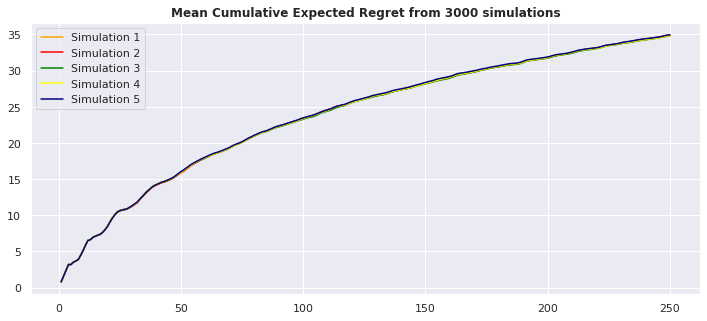

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df_1['time'],df_1['cumulative_regret'],color='orange',label='Simulation 1')
plt.plot(df_2['time'],df_2['cumulative_regret'],color='red',label='Simulation 2')
plt.plot(df_3['time'],df_3['cumulative_regret'],color='green',label='Simulation 3')
plt.plot(df_4['time'],df_4['cumulative_regret'],color='yellow',label='Simulation 4')
plt.plot(df_5['time'],df_5['cumulative_regret'],color='navy',label='Simulation 5')
plt.legend()
plt.title('Mean Cumulative Expected Regret from 3000 simulations',fontsize=12,weight='bold')
plt.show()

###5.Plot multiple simulations of the performance of Thompson sampling algorithm. Comment on which algorithm is better qualitatively.

Again, we generated the plots for the Thompson sampling algorithm in the same way that we did the other two so that we can compare all three based on the resulting plots. For Thompson, we also completed 5 trials of the algorithm.

In [ ]:
df_1 = pd.DataFrame({'sim':results_Thompson[0][0],'time':results_Thompson[0][1],'arm_result':results_Thompson[0][2]})
df_2 = pd.DataFrame({'sim':results_Thompson[1][0],'time':results_Thompson[1][1],'arm_result':results_Thompson[1][2]})
df_3 = pd.DataFrame({'sim':results_Thompson[2][0],'time':results_Thompson[2][1],'arm_result':results_Thompson[2][2]})
df_4 = pd.DataFrame({'sim':results_Thompson[3][0],'time':results_Thompson[3][1],'arm_result':results_Thompson[3][2]})
df_5 = pd.DataFrame({'sim':results_Thompson[4][0],'time':results_Thompson[4][1],'arm_result':results_Thompson[4][2]})

In [ ]:
# calculate percent of best arm 
df_n1=df_1.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)
df_n2=df_2.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)
df_n3=df_3.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)
df_n4=df_4.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)
df_n5=df_5.groupby(['time']).apply(lambda x: countfunc(x['arm_result'])/4000)

df_n1=df_n1.reset_index()
df_n2=df_n2.reset_index()
df_n3=df_n3.reset_index()
df_n4=df_n4.reset_index()
df_n5=df_n5.reset_index()

The plot below demonstrates the mean rate of choosing the best arm in terms of arm selection (among 5 arms)

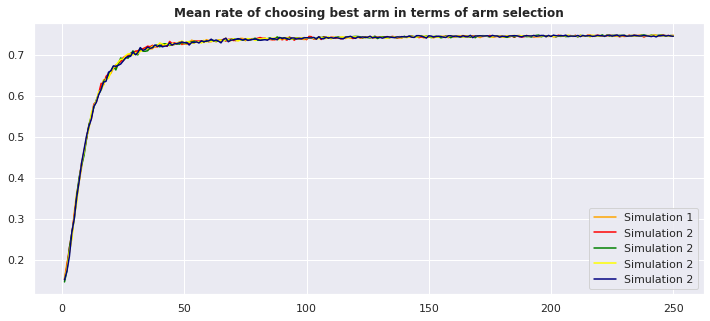

In [ ]:
#plot the percent of each epsilon simulation
sns.set()
plt.figure(figsize=(12,5))
plt.plot(df_n1['time'],df_n1[0],color='orange',label='Simulation 1')
plt.plot(df_n2['time'],df_n2[0],color='red',label='Simulation 2')
plt.plot(df_n3['time'],df_n3[0],color='green',label='Simulation 2')
plt.plot(df_n4['time'],df_n4[0],color='yellow',label='Simulation 2')
plt.plot(df_n5['time'],df_n5[0],color='navy',label='Simulation 2')
plt.legend()
plt.title('Mean rate of choosing best arm in terms of arm selection',fontsize=12,weight='bold')
plt.show()

In [ ]:
df_1['cumulative_reward'] = results_Thompson[0][4]
df_2['cumulative_reward'] = results_Thompson[1][4]
df_3['cumulative_reward'] = results_Thompson[2][4]
df_4['cumulative_reward'] = results_Thompson[3][4]
df_5['cumulative_reward'] = results_Thompson[4][4]

df_1['max_reward']=df_1['time']*0.9
df_2['max_reward']=df_2['time']*0.9
df_3['max_reward']=df_3['time']*0.9
df_4['max_reward']=df_4['time']*0.9
df_5['max_reward']=df_5['time']*0.9

df_1['cumulative_regret']=df_1['max_reward']-df_1['cumulative_reward']
df_2['cumulative_regret']=df_2['max_reward']-df_2['cumulative_reward']
df_3['cumulative_regret']=df_3['max_reward']-df_3['cumulative_reward']
df_4['cumulative_regret']=df_4['max_reward']-df_4['cumulative_reward']
df_5['cumulative_regret']=df_5['max_reward']-df_5['cumulative_reward']

df_1 = df_1.groupby(['time'])['cumulative_regret'].mean()
df_2 = df_2.groupby(['time'])['cumulative_regret'].mean()
df_3 = df_3.groupby(['time'])['cumulative_regret'].mean()
df_4 = df_4.groupby(['time'])['cumulative_regret'].mean()
df_5 = df_5.groupby(['time'])['cumulative_regret'].mean()

df_1 = df_1.reset_index()
df_2 = df_2.reset_index()
df_3 = df_3.reset_index()
df_4 = df_4.reset_index()
df_5 = df_5.reset_index()

Finally, we ploted the expected cumulative regret for the Thompson sampling method.

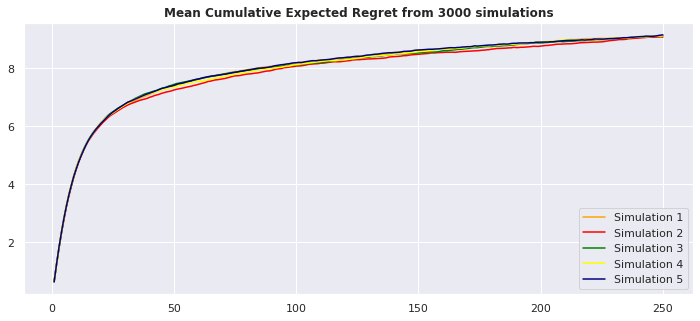

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df_1['time'],df_1['cumulative_regret'],color='orange',label='Simulation 1')
plt.plot(df_2['time'],df_2['cumulative_regret'],color='red',label='Simulation 2')
plt.plot(df_3['time'],df_3['cumulative_regret'],color='green',label='Simulation 3')
plt.plot(df_4['time'],df_4['cumulative_regret'],color='yellow',label='Simulation 4')
plt.plot(df_5['time'],df_5['cumulative_regret'],color='navy',label='Simulation 5')
plt.legend()
plt.title('Mean Cumulative Expected Regret from 3000 simulations',fontsize=12,weight='bold')
plt.show()

**EVALUATION OF BANDIT ALGORITHMS:**
* We can use the cumulative expected regret plot to determine which of the algorithms is 'best'. For Epsilon-Greedy, the expected cumulative regret varies based on the value of Epsilon, but the best performance is with the Epsilon value of 0.2 because it is choosing the best arm the majority of the time in this case. The cumulative expected regret is around 50 at the end of the total time period for this algorithm. 

* For UCB1, the cumulative expected regret is lower, around 35. There is a lot more variance in the mean rate of choosing the best arm, but at the end it seems to have a slightly higher probability of choosing the best arm than the Epsilon-Greedy 0.2, explaining the lower regret. 

* Finally, Thompson sampling shows to be the best algorithm because the cumulative expected regret is only around 9. This is because the model is able to reach almost a 100% probability of choosing the best arm, as evident in the plot showing the mean rate of choosing the optimal arm. This algorithm doesn't involve the random choice associated with Epsilon-Greedy and just tries to learn the best and only select the best arm, which is why the performance is so much higher.

--------------------

##**Question 3: Reinforcement Learning**

###1.Describe the state, actions, transitions and rewards for the cartpole environment using the gym package documentation.

*  State: All obseravations are assigned at a uniform random value in [-0.05..0.5]

*  Actions: 0- Push cart to the left, 1- push cart to the right (Note: the velocity depends on the angle of the pole)

*  Rewards: Scalar float value ~ 1 for every step taken, including the termination step

*  Transitions: Pole attached to the an un-actuated joint to a cart that moves along a frictionless track. The episole will not be terminated if the pole angle is not more than 12 degree. Cart position is not more than 2.4, episode length is not greater than 200.

###2.Describe the Q-network used in ‘dqn.py‘. What are the layers and what are the outputs?

*  There are three hidden fully connected layers in the Q-network. All three are of the nn.Linear class, which means they perform linear transformations on the data. Here they are:

1. self.fc1 = nn.Linear(4, 128)
2. self.fc2 = nn.Linear(128, 128)
3. self.fc3 = nn.Linear(128, 2)

*  The first layer takes an input of size 4 and the output is size 128. Then, the second takes input of size 128 and output is also size 128. Finally, the last layer takes an input of size 128, and outputs size 2. 

###3.Run the default DQN configuration for cartpole in ‘dqn.py‘ and plot the (25,50,75)- percentile reward performance curves over multiple simulations/runs

The main idea behind Q-learning is that if we had a function
$Q^*: State \times Action \rightarrow \mathbb{R}$, that could tell
us what our return would be, if we were to take an action in a given
state, then we could easily construct a policy that maximizes our
rewards:

\begin{align}\pi^*(s) = \arg\!\max_a \ Q^*(s, a)\end{align}

However, we don't know everything about the world, so we don't have
access to $Q^*$. But, since neural networks are universal function
approximators, we can simply create one and train it to resemble
$Q^*$. Firstly, we imported packages to run DQN configuration for cartpole.

In [ ]:
# Load required packages
import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Then, we initialized the hyperparameters such as learning rate, gamma, bugger limit and batch size.

In [ ]:
# Set Hyperparameters
# Initialize
learning_rate = 0.0005
gamma         = 0.98
buffer_limit  = 50000
batch_size    = 32

We will be using experience "replay buffer" for training our DQN. It stores the transitions that the agent observes, allowing us to reuse this data. With this class, an "experience replay buffer" that stores the (s, s’, a, r) values of hundreds of games and choose a batch randomly from it each time to update the model.

In [ ]:
class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)
    
    def put(self, transition):
        self.buffer.append(transition)
    
    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []
        
        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)
    
    def size(self):
        return len(self.buffer)

Our model is a basic neural network that computes difference between the current and previous screen patches. The model has two outputs, representing Q(s, left) and Q(s, right) (where s is the input to the network). Finally, the network is trying to predict the quality of taking each action given the current input.

In [ ]:
class Qnet(nn.Module): # build NN class
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1)
        else : 
            return out.argmax().item()
            

* Two things must happen during the training loop: collect data from the environment and use that data to train the agent's neural networks. This example also periodicially evaluates the policy and prints the current score.

*  You can find the main training loop below. At the initial step, we reset
the environment and initialize the ``state`` Tensor. Then, we sample
an action, execute it, observe the next screen and the reward, and optimize our model once. When the episode ends (our model fails), we restart the loop.

In [ ]:
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out.gather(1,a)
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)
        
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()

all_reward=[]
def main():
    env = gym.make('CartPole-v1')
    q = Qnet()
    q_target = Qnet()
    q_target.load_state_dict(q.state_dict())
    memory = ReplayBuffer()

    print_interval = 20
    score = 0.0  
    optimizer = optim.Adam(q.parameters(), lr=learning_rate) # use Adam optimizer

    for n_epi in range(10000):
        epsilon = max(0.01, 0.08 - 0.01*(n_epi/200)) #Linear annealing from 8% to 1%
        s = env.reset()
        done = False

        while not done:
            a = q.sample_action(torch.from_numpy(s).float(), epsilon)      
            s_prime, r, done, info = env.step(a)
            done_mask = 0.0 if done else 1.0
            memory.put((s,a,r/100.0,s_prime, done_mask))
            s = s_prime

            score += r
            if done:
                break
            
        if memory.size()>2000:
            train(q, q_target, memory, optimizer) # run train function

        if n_epi%print_interval==0 and n_epi!=0:
            all_reward.append(score/print_interval)
            q_target.load_state_dict(q.state_dict())
            print("N_episode :{}, Score : {:.1f}, N_buffer : {}, eps : {:.1f}%".format(
                                                            n_epi, score/print_interval, memory.size(), epsilon*100))
            score = 0.0
    env.close()

if __name__ == '__main__':
    main()

N_episode :20, Score : 10.3, N_buffer : 207, eps : 7.9%
N_episode :40, Score : 9.8, N_buffer : 402, eps : 7.8%
N_episode :60, Score : 9.6, N_buffer : 594, eps : 7.7%
N_episode :80, Score : 9.6, N_buffer : 786, eps : 7.6%
N_episode :100, Score : 9.8, N_buffer : 981, eps : 7.5%
N_episode :120, Score : 10.1, N_buffer : 1182, eps : 7.4%
N_episode :140, Score : 9.6, N_buffer : 1373, eps : 7.3%
N_episode :160, Score : 9.9, N_buffer : 1572, eps : 7.2%
N_episode :180, Score : 10.1, N_buffer : 1773, eps : 7.1%
N_episode :200, Score : 9.4, N_buffer : 1962, eps : 7.0%
N_episode :220, Score : 11.2, N_buffer : 2186, eps : 6.9%
N_episode :240, Score : 11.9, N_buffer : 2424, eps : 6.8%
N_episode :260, Score : 11.1, N_buffer : 2645, eps : 6.7%
N_episode :280, Score : 15.2, N_buffer : 2950, eps : 6.6%
N_episode :300, Score : 17.0, N_buffer : 3290, eps : 6.5%
N_episode :320, Score : 31.9, N_buffer : 3928, eps : 6.4%
N_episode :340, Score : 59.0, N_buffer : 5107, eps : 6.3%
N_episode :360, Score : 121.5,

**Plot the  (25,50,75) percentile reward**

We executed same algorithm in which we did above and ran multiple times to see changes in performance.

In [ ]:
import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Hyperparameters
learning_rate = 0.0005
gamma         = 0.98
buffer_limit  = 50000
batch_size    = 32

class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)
    
    def put(self, transition):
        self.buffer.append(transition)
    
    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []
        
        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)
    
    def size(self):
        return len(self.buffer)

class Qnet(nn.Module):
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1)
        else : 
            return out.argmax().item()
            
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out.gather(1,a)
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def main():
    score_dict_r1={}
    score_dict_r2={}
    score_dict_r3={}
    score_dict_listr=[score_dict_r1,score_dict_r2,score_dict_r3]
    rep=3
    for j in range (rep):
        env = gym.make('CartPole-v1')
        q = Qnet()
        q_target = Qnet()
        q_target.load_state_dict(q.state_dict())
        memory = ReplayBuffer()

        print_interval = 20
        score = 0.0  
        optimizer = optim.Adam(q.parameters(), lr=learning_rate)
        # epi_list1=[]
        # score_list1=[]
        
        
        for n_epi in range(5000):
            epsilon = max(0.01, 0.08 - 0.01*(n_epi/200)) #Linear annealing from 8% to 1%
            s = env.reset()
            done = False
            
            while not done:
                a = q.sample_action(torch.from_numpy(s).float(), epsilon)      
                s_prime, r, done, info = env.step(a)
                done_mask = 0.0 if done else 1.0
                memory.put((s,a,r/100.0,s_prime, done_mask))
                s = s_prime

                score += r
                if done:
                    break
            # epi_list1.append(n_epi)
            # score_list1.append(score)     

            score_dict_listr[j][n_epi]=score/print_interval
        
            if memory.size()>2000:
                train(q, q_target, memory, optimizer)
      

            if n_epi%print_interval==0 and n_epi!=0:
                q_target.load_state_dict(q.state_dict())
                print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                                n_epi, score/print_interval, memory.size(), epsilon*100))
                # epi_list1.append(n_epi)
                # score_list1.append(score)
                score = 0.0
         
        env.close()
    return score_dict_r1,score_dict_r2,score_dict_r3

if __name__ == '__main__':
    score_dict_r1,score_dict_r2,score_dict_r3=main()

n_episode :20, score : 12.1, n_buffer : 242, eps : 7.9%
n_episode :40, score : 10.8, n_buffer : 458, eps : 7.8%
n_episode :60, score : 11.0, n_buffer : 678, eps : 7.7%
n_episode :80, score : 11.8, n_buffer : 913, eps : 7.6%
n_episode :100, score : 10.2, n_buffer : 1116, eps : 7.5%
n_episode :120, score : 11.4, n_buffer : 1345, eps : 7.4%
n_episode :140, score : 11.9, n_buffer : 1584, eps : 7.3%
n_episode :160, score : 10.8, n_buffer : 1799, eps : 7.2%
n_episode :180, score : 11.2, n_buffer : 2023, eps : 7.1%
n_episode :200, score : 10.2, n_buffer : 2228, eps : 7.0%
n_episode :220, score : 10.0, n_buffer : 2428, eps : 6.9%
n_episode :240, score : 10.3, n_buffer : 2634, eps : 6.8%
n_episode :260, score : 10.4, n_buffer : 2842, eps : 6.7%
n_episode :280, score : 13.5, n_buffer : 3112, eps : 6.6%
n_episode :300, score : 19.2, n_buffer : 3496, eps : 6.5%
n_episode :320, score : 58.7, n_buffer : 4670, eps : 6.4%
n_episode :340, score : 75.8, n_buffer : 6186, eps : 6.3%
n_episode :360, score 

We executed multiple simulations of same algorithm (3 times), then calculated the score for each episode and saved the results as dataframe whose dimension is 5000 x 4.

In [ ]:
import pandas as pd
df_r1=pd.DataFrame(score_dict_r1.items(), columns=['episode', 'score1'])
df_r2=pd.DataFrame(score_dict_r2.items(), columns=['episode', 'score2'])
df_r3=pd.DataFrame(score_dict_r3.items(), columns=['episode', 'score3'])
df_rep_combine=pd.concat([df_r1, df_r2['score2'],df_r3['score3']], axis=1, sort=False)
df_rep_combine.head(5)

,episode,score1,score2,score3
0,0,0.55,0.50,0.45
1,1,1.40,0.90,0.95
2,2,2.10,1.40,1.45
3,3,2.60,1.85,1.95
4,4,3.50,2.30,2.45


Afterwards, we computed first, second and third quantile of each simulation's results to evaluate reward performance.

In [ ]:

quant_25=df_rep_combine.quantile(q=0.25,axis=1)
quant_50=df_rep_combine.quantile(q=0.50,axis=1)
quant_75=df_rep_combine.quantile(q=0.75,axis=1)

df_quant_25=quant_25.to_frame()
df_quant_50=quant_50.to_frame()
df_quant_75=quant_75.to_frame()

df_quant_25_i=df_quant_25.reset_index()
df_quant_50_i=df_quant_50.reset_index()
df_quant_75_i=df_quant_75.reset_index()

df_quant_25_f=df_quant_25_i.rename(columns = {'index':'episode',0.25:'score'})
df_quant_50_f=df_quant_50_i.rename(columns = {'index':'episode',0.50:'score'})
df_quant_75_f=df_quant_75_i.rename(columns = {'index':'episode',0.75:'score'})


In [ ]:
import pandas as pd
df_quant_25_int=df_quant_25_f[(df_quant_25_f.index%20==0)]
df_quant_50_int=df_quant_50_f[(df_quant_50_f.index%20==0)]
df_quant_75_int=df_quant_75_f[(df_quant_75_f.index%20==0)]
df_quant_25_int.head(5)

,episode,score
0,0,0.3375
20,20,11.5750
40,40,10.5500
60,60,10.5750
80,80,10.4125


Finally, we plotted (25,50,75) percentile reward performance over multiple runs as shown below.

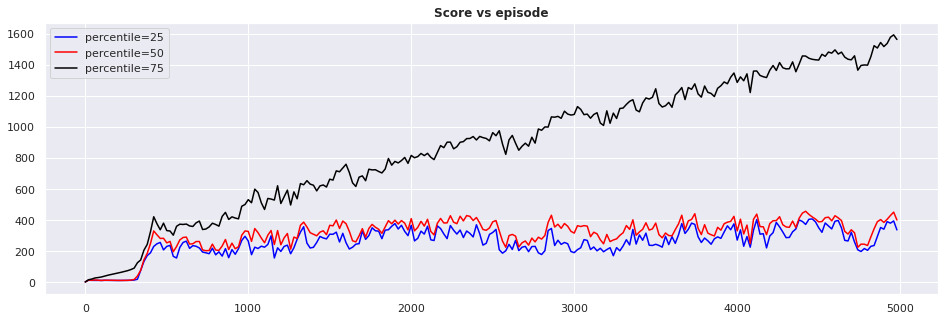

In [ ]:
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt # import matplotlib package
plt.figure(figsize=(16,5))
plt.plot(df_quant_25_int['episode'],df_quant_25_int['score'],color='blue',label='percentile=25')
plt.plot(df_quant_50_int['episode'],df_quant_50_int['score'],color='red',label='percentile=50')
plt.plot(df_quant_75_int['episode'],df_quant_75_int['score'],color='black',label='percentile=75')
plt.title('Score vs episode',fontsize=12,weight='bold')
plt.legend()
plt.show()

As the episode increases, the score increases. This indicates that the performance of the model get better over the increasing of episode. The 50 percentile reward performance curve is slightly better than the 25 percentile reward performance curve. The 75 percentile reward performance curve performs significantly better than the 25 and 50 percentile reward performance curves.  

###4.Change the epsilon value (for exploration) to fixed values {0.01, 0.1} and plot its impact on learning. Provide an interpretation of the trend observed.

We changed the epsilon value to explore environment and applied same approach in which we did above. Firstly, we executed the model by using 0.01 epsilon value.

In [ ]:
import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Then, we initialized the hyperparameters such as learning rate, gamma, bugger limit and batch size.

In [ ]:
#Hyperparameters
learning_rate = 0.0005
gamma         = 0.98
buffer_limit  = 50000
batch_size    = 32

We will be using experience "replay buffer" for training our DQN. It stores the transitions that the agent observes, allowing us to reuse this data.

In [ ]:
class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)
    
    def put(self, transition):
        self.buffer.append(transition)
    
    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []
        
        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)
    
    def size(self):
        return len(self.buffer)

We implemented same approach in which we did in part 3.

In [ ]:
class Qnet(nn.Module):
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1)
        else : 
            return out.argmax().item()
            
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out.gather(1,a)
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def main():
    score_dict1={}
    scoretotal_dic1={}
    rep=3
    for j in range (rep):
        env = gym.make('CartPole-v1')
        q = Qnet()
        q_target = Qnet()
        q_target.load_state_dict(q.state_dict())
        memory = ReplayBuffer()

        print_interval = 20
        score = 0.0  
        optimizer = optim.Adam(q.parameters(), lr=learning_rate)
        # epi_list0=[]
        # score_list0=[]
        for n_epi in range(5000):
            epsilon = 0.01 #Linear annealing from 8% to 1%
            s = env.reset()
            done = False

            while not done:
                a = q.sample_action(torch.from_numpy(s).float(), epsilon)      
                s_prime, r, done, info = env.step(a)
                done_mask = 0.0 if done else 1.0
                memory.put((s,a,r/100.0,s_prime, done_mask))
                s = s_prime

                score += r
                if done:
                    break
            score_dict1[n_epi]=score/print_interval   

            if memory.size()>2000:
                train(q, q_target, memory, optimizer)

            if n_epi%print_interval==0 and n_epi!=0:
                q_target.load_state_dict(q.state_dict())
                print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                                n_epi, score/print_interval, memory.size(), epsilon*100))
                # epi_list0.append(n_epi)
                # score_list0.append(score)
                
                score = 0.0
        for key, value in score_dict1.items():
          if key in scoretotal_dic1.keys():
              scoretotal_dic1[key]+=value
          else:
              scoretotal_dic1[key]=value

    for key, value in scoretotal_dic1.items():
        scoretotal_dic1[key]=value/rep 
        env.close()
    return score_dict1,scoretotal_dic1

if __name__ == '__main__':
     score_dict1, scoretotal_dic1=main()

n_episode :20, score : 18.2, n_buffer : 365, eps : 1.0%
n_episode :40, score : 19.1, n_buffer : 748, eps : 1.0%
n_episode :60, score : 18.8, n_buffer : 1124, eps : 1.0%
n_episode :80, score : 18.0, n_buffer : 1484, eps : 1.0%
n_episode :100, score : 18.9, n_buffer : 1862, eps : 1.0%
n_episode :120, score : 15.2, n_buffer : 2166, eps : 1.0%
n_episode :140, score : 12.6, n_buffer : 2417, eps : 1.0%
n_episode :160, score : 15.4, n_buffer : 2726, eps : 1.0%
n_episode :180, score : 13.1, n_buffer : 2988, eps : 1.0%
n_episode :200, score : 19.8, n_buffer : 3384, eps : 1.0%
n_episode :220, score : 102.7, n_buffer : 5438, eps : 1.0%
n_episode :240, score : 329.0, n_buffer : 12018, eps : 1.0%
n_episode :260, score : 171.1, n_buffer : 15440, eps : 1.0%
n_episode :280, score : 264.8, n_buffer : 20736, eps : 1.0%
n_episode :300, score : 278.1, n_buffer : 26298, eps : 1.0%
n_episode :320, score : 243.5, n_buffer : 31168, eps : 1.0%
n_episode :340, score : 223.7, n_buffer : 35642, eps : 1.0%
n_episo

In [ ]:
import pandas as pd
df_e001=pd.DataFrame(scoretotal_dic1.items(), columns=['episode', 'score'])
df_e001.head(5)

,episode,score
0,0,0.716667
1,1,1.550000
2,2,2.533333
3,3,3.400000
4,4,4.383333
...,...,...
4995,4995,248.600000
4996,4996,266.616667
4997,4997,288.200000
4998,4998,304.566667


In [ ]:
import pandas as pd
df_e001_int=df_e001[(df_e001.index%20==0)]
df_e001_int.head(5)

,episode,score
0,0,0.716667
20,20,16.933333
40,40,16.466667
60,60,16.466667
80,80,15.550000
...,...,...
4900,4900,374.666667
4920,4920,348.166667
4940,4940,304.500000
4960,4960,313.916667


Afterwards, we used 0.1 epsilon value to understand how the model works.

In [ ]:
#eps=0.1
import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Hyperparameters
learning_rate = 0.0005
gamma         = 0.98
buffer_limit  = 50000
batch_size    = 32

class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)
    
    def put(self, transition):
        self.buffer.append(transition)
    
    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []
        
        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)
    
    def size(self):
        return len(self.buffer)

class Qnet(nn.Module):
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1)
        else : 
            return out.argmax().item()
            
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out.gather(1,a)
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def main():
    score_dict={}
    scoretotal_dic={}
    rep=3
    for j in range (rep):
        env = gym.make('CartPole-v1')
        q = Qnet()
        q_target = Qnet()
        q_target.load_state_dict(q.state_dict())
        memory = ReplayBuffer()

        print_interval = 20
        score = 0.0  
        optimizer = optim.Adam(q.parameters(), lr=learning_rate)
        # epi_list1=[]
        # score_list1=[]
        
        
        for n_epi in range(5000):
            epsilon = 0.1 #Linear annealing from 8% to 1%
            s = env.reset()
            done = False
            
            while not done:
                a = q.sample_action(torch.from_numpy(s).float(), epsilon)      
                s_prime, r, done, info = env.step(a)
                done_mask = 0.0 if done else 1.0
                memory.put((s,a,r/100.0,s_prime, done_mask))
                s = s_prime

                score += r
                if done:
                    break
            # epi_list1.append(n_epi)
            # score_list1.append(score)     
            score_dict[n_epi]=score/print_interval
        
            if memory.size()>2000:
                train(q, q_target, memory, optimizer)
      

            if n_epi%print_interval==0 and n_epi!=0:
                q_target.load_state_dict(q.state_dict())
                print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                                n_epi, score/print_interval, memory.size(), epsilon*100))
                # epi_list1.append(n_epi)
                # score_list1.append(score)
                score = 0.0
        for key, value in score_dict.items():
          if key in scoretotal_dic.keys():
              scoretotal_dic[key]+=value
          else:
              scoretotal_dic[key]=value

    for key, value in scoretotal_dic.items():
        scoretotal_dic[key]=value/rep 
        env.close()
    return score_dict,scoretotal_dic

if __name__ == '__main__':
    score_dict,scoretotal_dic=main()

n_episode :20, score : 10.6, n_buffer : 212, eps : 10.0%
n_episode :40, score : 9.9, n_buffer : 410, eps : 10.0%
n_episode :60, score : 9.7, n_buffer : 604, eps : 10.0%
n_episode :80, score : 10.0, n_buffer : 804, eps : 10.0%
n_episode :100, score : 9.6, n_buffer : 996, eps : 10.0%
n_episode :120, score : 9.8, n_buffer : 1191, eps : 10.0%
n_episode :140, score : 10.2, n_buffer : 1395, eps : 10.0%
n_episode :160, score : 9.3, n_buffer : 1581, eps : 10.0%
n_episode :180, score : 10.4, n_buffer : 1789, eps : 10.0%
n_episode :200, score : 10.3, n_buffer : 1996, eps : 10.0%
n_episode :220, score : 12.9, n_buffer : 2254, eps : 10.0%
n_episode :240, score : 11.1, n_buffer : 2475, eps : 10.0%
n_episode :260, score : 11.3, n_buffer : 2702, eps : 10.0%
n_episode :280, score : 13.7, n_buffer : 2976, eps : 10.0%
n_episode :300, score : 14.9, n_buffer : 3275, eps : 10.0%
n_episode :320, score : 39.5, n_buffer : 4066, eps : 10.0%
n_episode :340, score : 111.3, n_buffer : 6293, eps : 10.0%
n_episode 

The dataframe below shows the score of each episode for each simulation.

In [ ]:
import pandas as pd
df_e01=pd.DataFrame(scoretotal_dic.items(), columns=['episode', 'score'])
df_e01.head(5)

,episode,score
0,0,0.666667
1,1,1.383333
2,2,2.083333
3,3,2.650000
4,4,3.333333
...,...,...
4995,4995,190.883333
4996,4996,202.366667
4997,4997,218.216667
4998,4998,234.783333


In [ ]:
import pandas as pd
df_e01_int=df_e01[(df_e01.index%20==0)]
df_e01_int.head(5)

,episode,score
0,0,0.666667
20,20,13.250000
40,40,12.450000
60,60,12.133333
80,80,12.450000
...,...,...
4900,4900,271.783333
4920,4920,239.566667
4940,4940,215.733333
4960,4960,314.383333


**Plot epsilon value impact on learning**

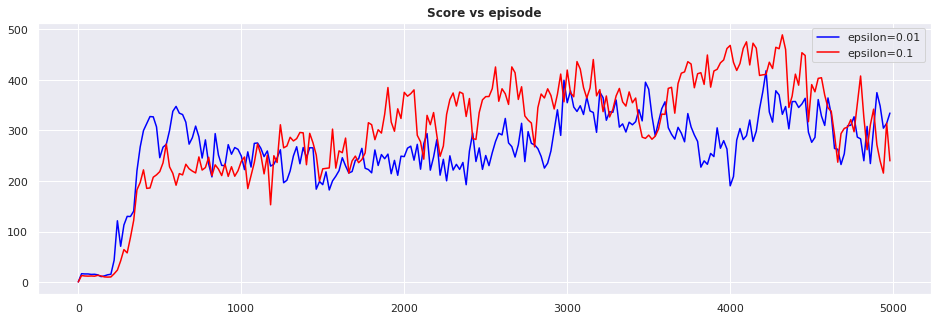

In [ ]:
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt # import matplotlib package
plt.figure(figsize=(16,5))
plt.plot(df_e001_int['episode'],df_e001_int['score'],color='blue',label='epsilon=0.01')
plt.plot(df_e01_int['episode'],df_e01_int['score'],color='red',label='epsilon=0.1')
plt.title('Score vs episode',fontsize=12,weight='bold')
plt.legend()
plt.show()

Initially from 0-1000 episode (approximately), the score for epsilon 0.01 is higher, indicating the performance of the model is better than the model with 0.1 epsilon. However, after 1000 episode, the score for epsilon 0.1 curve is higher, indicating the performance of the model with 0.1 epsilon is better  than the one with 0.01 epsilon.

###5.Change the buffer limit (of the experience replay buffer) to {5000, 10000, 25000} and plot its impact on learning. Provide an interpretation of the trend observed

To understand effect of replay buffer in Q Learning, we first used the buffer limit of 5000.

In [ ]:
import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Hyperparameters
learning_rate = 0.0005
gamma         = 0.98
buffer_limit  = 5000
batch_size    = 32

class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)
    
    def put(self, transition):
        self.buffer.append(transition)
    
    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []
        
        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)
    
    def size(self):
        return len(self.buffer)

class Qnet(nn.Module):
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1)
        else : 
            return out.argmax().item()
            
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out.gather(1,a)
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def main():
    score_dict2={}
    scoretotal_dic2={}
    rep=3
    for j in range (rep):
        env = gym.make('CartPole-v1')
        q = Qnet()
        q_target = Qnet()
        q_target.load_state_dict(q.state_dict())
        memory = ReplayBuffer()

        print_interval = 20
        score = 0.0  
        optimizer = optim.Adam(q.parameters(), lr=learning_rate)

        # epi_list_p5=[]
        # score_list_p5=[]
        for n_epi in range(5000):
            epsilon = max(0.01, 0.08 - 0.01*(n_epi/200)) #Linear annealing from 8% to 1%
            s = env.reset()
            done = False

            while not done:
                a = q.sample_action(torch.from_numpy(s).float(), epsilon)      
                s_prime, r, done, info = env.step(a)
                done_mask = 0.0 if done else 1.0
                memory.put((s,a,r/100.0,s_prime, done_mask))
                s = s_prime

                score += r
                if done:
                    break
            
            score_dict2[n_epi]=score/print_interval    
            if memory.size()>2000:
                train(q, q_target, memory, optimizer)

            if n_epi%print_interval==0 and n_epi!=0:
                q_target.load_state_dict(q.state_dict())
                print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                                n_epi, score/print_interval, memory.size(), epsilon*100))
                # epi_list_p5.append(n_epi)
                # score_list_p5.append(score)
                score = 0.0
        for key, value in score_dict2.items():
          if key in scoretotal_dic2.keys():
              scoretotal_dic2[key]+=value
          else:
              scoretotal_dic2[key]=value

    for key, value in scoretotal_dic2.items():
        scoretotal_dic2[key]=value/rep
        env.close()
    return score_dict2, scoretotal_dic2

if __name__ == '__main__':
    score_dict2,scoretotal_dic2=main()

n_episode :20, score : 10.1, n_buffer : 201, eps : 7.9%
n_episode :40, score : 9.6, n_buffer : 393, eps : 7.8%
n_episode :60, score : 9.8, n_buffer : 590, eps : 7.7%
n_episode :80, score : 9.6, n_buffer : 781, eps : 7.6%
n_episode :100, score : 9.8, n_buffer : 976, eps : 7.5%
n_episode :120, score : 9.8, n_buffer : 1173, eps : 7.4%
n_episode :140, score : 9.8, n_buffer : 1368, eps : 7.3%
n_episode :160, score : 9.3, n_buffer : 1554, eps : 7.2%
n_episode :180, score : 9.8, n_buffer : 1749, eps : 7.1%
n_episode :200, score : 9.6, n_buffer : 1940, eps : 7.0%
n_episode :220, score : 9.9, n_buffer : 2139, eps : 6.9%
n_episode :240, score : 10.5, n_buffer : 2349, eps : 6.8%
n_episode :260, score : 10.1, n_buffer : 2550, eps : 6.7%
n_episode :280, score : 10.2, n_buffer : 2753, eps : 6.6%
n_episode :300, score : 11.4, n_buffer : 2981, eps : 6.5%
n_episode :320, score : 12.8, n_buffer : 3236, eps : 6.4%
n_episode :340, score : 19.1, n_buffer : 3617, eps : 6.3%
n_episode :360, score : 47.5, n_b

In [ ]:
import pandas as pd
df_b5=pd.DataFrame(scoretotal_dic2.items(), columns=['episode', 'score'])
df_b5.head(5)

,episode,score
0,0,0.466667
1,1,0.950000
2,2,1.433333
3,3,1.966667
4,4,2.466667
...,...,...
4995,4995,235.450000
4996,4996,251.550000
4997,4997,264.033333
4998,4998,280.650000


In [ ]:
import pandas as pd
df_b5_int=df_b5[(df_b5.index%20==0)]
df_b5_int.head(5)

,episode,score
0,0,0.466667
20,20,10.150000
40,40,9.633333
60,60,9.600000
80,80,9.750000
...,...,...
4900,4900,317.766667
4920,4920,277.050000
4940,4940,268.466667
4960,4960,264.333333


Next, we increased the buffer limit to 10000.

In [ ]:
import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Hyperparameters
learning_rate = 0.0005
gamma         = 0.98
buffer_limit  = 10000
batch_size    = 32

class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)
    
    def put(self, transition):
        self.buffer.append(transition)
    
    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []
        
        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)
    
    def size(self):
        return len(self.buffer)

class Qnet(nn.Module):
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1)
        else : 
            return out.argmax().item()
            
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out.gather(1,a)
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def main():
    score_dict3={}
    scoretotal_dic3={}
    rep=3
    for j in range (rep):
        env = gym.make('CartPole-v1')
        q = Qnet()
        q_target = Qnet()
        q_target.load_state_dict(q.state_dict())
        memory = ReplayBuffer()

        print_interval = 20
        score = 0.0  
        optimizer = optim.Adam(q.parameters(), lr=learning_rate)

        # epi_list_p5=[]
        # score_list_p5=[]
        for n_epi in range(5000):
            epsilon = max(0.01, 0.08 - 0.01*(n_epi/200)) #Linear annealing from 8% to 1%
            s = env.reset()
            done = False

            while not done:
                a = q.sample_action(torch.from_numpy(s).float(), epsilon)      
                s_prime, r, done, info = env.step(a)
                done_mask = 0.0 if done else 1.0
                memory.put((s,a,r/100.0,s_prime, done_mask))
                s = s_prime

                score += r
                if done:
                    break
            
            score_dict3[n_epi]=score/print_interval    
            if memory.size()>2000:
                train(q, q_target, memory, optimizer)

            if n_epi%print_interval==0 and n_epi!=0:
                q_target.load_state_dict(q.state_dict())
                print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                                n_epi, score/print_interval, memory.size(), epsilon*100))
                # epi_list_p5.append(n_epi)
                # score_list_p5.append(score)
                score = 0.0
        for key, value in score_dict3.items():
          if key in scoretotal_dic3.keys():
              scoretotal_dic3[key]+=value
          else:
              scoretotal_dic3[key]=value

    for key, value in scoretotal_dic3.items():
        scoretotal_dic3[key]=value/rep
        env.close()
    return score_dict3, scoretotal_dic3

if __name__ == '__main__':
    score_dict3,scoretotal_dic3=main()

n_episode :20, score : 11.6, n_buffer : 231, eps : 7.9%
n_episode :40, score : 10.6, n_buffer : 442, eps : 7.8%
n_episode :60, score : 10.6, n_buffer : 653, eps : 7.7%
n_episode :80, score : 10.3, n_buffer : 859, eps : 7.6%
n_episode :100, score : 10.4, n_buffer : 1068, eps : 7.5%
n_episode :120, score : 9.9, n_buffer : 1267, eps : 7.4%
n_episode :140, score : 10.4, n_buffer : 1475, eps : 7.3%
n_episode :160, score : 10.6, n_buffer : 1687, eps : 7.2%
n_episode :180, score : 10.3, n_buffer : 1893, eps : 7.1%
n_episode :200, score : 10.0, n_buffer : 2093, eps : 7.0%
n_episode :220, score : 13.4, n_buffer : 2362, eps : 6.9%
n_episode :240, score : 9.6, n_buffer : 2553, eps : 6.8%
n_episode :260, score : 10.8, n_buffer : 2768, eps : 6.7%
n_episode :280, score : 13.3, n_buffer : 3034, eps : 6.6%
n_episode :300, score : 45.7, n_buffer : 3948, eps : 6.5%
n_episode :320, score : 156.6, n_buffer : 7080, eps : 6.4%
n_episode :340, score : 181.5, n_buffer : 10000, eps : 6.3%
n_episode :360, score

The dataframe below indicates the reward score of each episode (in total 5000 epsiodes).

In [ ]:
import pandas as pd
df_b10=pd.DataFrame(scoretotal_dic3.items(), columns=['episode', 'score'])
df_b10.head(5)

,episode,score
0,0,0.466667
1,1,0.983333
2,2,1.483333
3,3,1.933333
4,4,2.450000
...,...,...
4995,4995,305.416667
4996,4996,318.350000
4997,4997,330.633333
4998,4998,349.133333


In [ ]:
import pandas as pd
df_b10_int=df_b10[(df_b10.index%20==0)]
df_b10_int.head(5)

,episode,score
0,0,0.466667
20,20,10.416667
40,40,10.033333
60,60,9.983333
80,80,9.866667
...,...,...
4900,4900,320.850000
4920,4920,338.900000
4940,4940,318.633333
4960,4960,407.916667


Finally, we ran a third time with the buffer limit of 25000.

In [ ]:
import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Hyperparameters
learning_rate = 0.0005
gamma         = 0.98
buffer_limit  = 25000
batch_size    = 32

class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)
    
    def put(self, transition):
        self.buffer.append(transition)
    
    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []
        
        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)
    
    def size(self):
        return len(self.buffer)

class Qnet(nn.Module):
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1)
        else : 
            return out.argmax().item()
            
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out.gather(1,a)
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def main():
    score_dict4={}
    scoretotal_dic4={}
    rep=3
    for j in range (rep):
        env = gym.make('CartPole-v1')
        q = Qnet()
        q_target = Qnet()
        q_target.load_state_dict(q.state_dict())
        memory = ReplayBuffer()

        print_interval = 20
        score = 0.0  
        optimizer = optim.Adam(q.parameters(), lr=learning_rate)

        # epi_list_p5=[]
        # score_list_p5=[]
        for n_epi in range(5000):
            epsilon = max(0.01, 0.08 - 0.01*(n_epi/200)) #Linear annealing from 8% to 1%
            s = env.reset()
            done = False

            while not done:
                a = q.sample_action(torch.from_numpy(s).float(), epsilon)      
                s_prime, r, done, info = env.step(a)
                done_mask = 0.0 if done else 1.0
                memory.put((s,a,r/100.0,s_prime, done_mask))
                s = s_prime

                score += r
                if done:
                    break
            
            score_dict4[n_epi]=score/print_interval    
            if memory.size()>2000:
                train(q, q_target, memory, optimizer)

            if n_epi%print_interval==0 and n_epi!=0:
                q_target.load_state_dict(q.state_dict())
                print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                                n_epi, score/print_interval, memory.size(), epsilon*100))
                # epi_list_p5.append(n_epi)
                # score_list_p5.append(score)
                score = 0.0
        for key, value in score_dict4.items():
          if key in scoretotal_dic4.keys():
              scoretotal_dic4[key]+=value
          else:
              scoretotal_dic4[key]=value

    for key, value in scoretotal_dic4.items():
        scoretotal_dic4[key]=value/rep
        env.close()
    return score_dict4, scoretotal_dic4

if __name__ == '__main__':
    score_dict4,scoretotal_dic4=main()

n_episode :20, score : 10.2, n_buffer : 205, eps : 7.9%
n_episode :40, score : 9.2, n_buffer : 390, eps : 7.8%
n_episode :60, score : 9.8, n_buffer : 585, eps : 7.7%
n_episode :80, score : 10.1, n_buffer : 786, eps : 7.6%
n_episode :100, score : 9.8, n_buffer : 982, eps : 7.5%
n_episode :120, score : 9.4, n_buffer : 1171, eps : 7.4%
n_episode :140, score : 9.5, n_buffer : 1361, eps : 7.3%
n_episode :160, score : 9.4, n_buffer : 1550, eps : 7.2%
n_episode :180, score : 9.9, n_buffer : 1749, eps : 7.1%
n_episode :200, score : 9.8, n_buffer : 1946, eps : 7.0%
n_episode :220, score : 26.1, n_buffer : 2467, eps : 6.9%
n_episode :240, score : 35.8, n_buffer : 3183, eps : 6.8%
n_episode :260, score : 27.1, n_buffer : 3726, eps : 6.7%
n_episode :280, score : 28.4, n_buffer : 4294, eps : 6.6%
n_episode :300, score : 44.6, n_buffer : 5186, eps : 6.5%
n_episode :320, score : 45.0, n_buffer : 6086, eps : 6.4%
n_episode :340, score : 62.4, n_buffer : 7333, eps : 6.3%
n_episode :360, score : 61.6, n

The dataframe shows the score of each simulation based on 25000 buffer limit.

In [ ]:
import pandas as pd
df_b25=pd.DataFrame(scoretotal_dic4.items(), columns=['episode', 'score'])
df_b25.head(5)

,episode,score
0,0,1.733333
1,1,4.800000
2,2,7.383333
3,3,9.300000
4,4,11.000000
...,...,...
4995,4995,178.316667
4996,4996,193.366667
4997,4997,204.283333
4998,4998,210.900000


In [ ]:
import pandas as pd
df_b25_int=df_b25[(df_b25.index%20==0)]
df_b25_int.head(5)

,episode,score
0,0,1.733333
20,20,48.533333
40,40,20.116667
60,60,17.016667
80,80,11.050000
...,...,...
4900,4900,232.966667
4920,4920,208.000000
4940,4940,224.000000
4960,4960,230.250000


**Plot "replay buffer limit" impact on learning**

Finally, we plotted performance of all simulations by using different buffer limits. (5000, 10000, 25000)

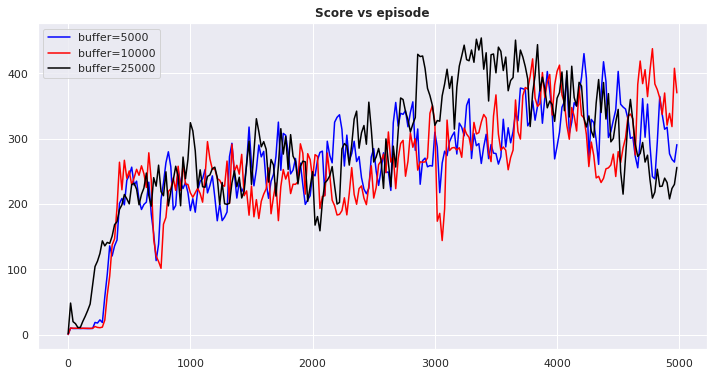

In [ ]:
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt # import matplotlib package
plt.figure(figsize=(12,6))
plt.plot(df_b5_int['episode'],df_b5_int['score'],color='blue',label='buffer=5000')
plt.plot(df_b10_int['episode'],df_b10_int['score'],color='red',label='buffer=10000')
plt.plot(df_b25_int['episode'],df_b25_int['score'],color='black',label='buffer=25000')
plt.title('Score vs episode',fontsize=12,weight='bold')
plt.legend()
plt.show()

With buffer 5000 and 10000, the score is similar, indicating the performance is similar. However, there are some interval from 1000 to 3000, buffer 5000 is slightly better than buffer 10000. The model which used 25000 buffer limit have higher scores than buffer 5000 and 10000 from episode 1000 to 4000 (approximately).

###6.Change gamma (for discounting) to {0.75, 0.9} and discuss its impact on on learn- ing. Provide an interpretation of the trend observed.

In this case, we tried to learn the effect of gamma (discounting) factor on Q learning. Keeping the other factors fixed, we finally experimented with changing the gamma. First, we started with 0.75.

In [ ]:
#gamma 0.75

import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Hyperparameters
learning_rate = 0.0005
gamma         = 0.75
buffer_limit  = 50000
batch_size    = 32

class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)
    
    def put(self, transition):
        self.buffer.append(transition)
    
    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []
        
        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)
    
    def size(self):
        return len(self.buffer)

class Qnet(nn.Module):
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1)
        else : 
            return out.argmax().item()
            
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out.gather(1,a)
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def main():
    score_dict5={}
    scoretotal_dic5={}
    rep=3
    for j in range (rep):
        env = gym.make('CartPole-v1')
        q = Qnet()
        q_target = Qnet()
        q_target.load_state_dict(q.state_dict())
        memory = ReplayBuffer()

        print_interval = 20
        score = 0.0  
        optimizer = optim.Adam(q.parameters(), lr=learning_rate)

        # epi_list_p5=[]
        # score_list_p5=[]
        for n_epi in range(5000):
            epsilon = max(0.01, 0.08 - 0.01*(n_epi/200)) #Linear annealing from 8% to 1%
            s = env.reset()
            done = False

            while not done:
                a = q.sample_action(torch.from_numpy(s).float(), epsilon)      
                s_prime, r, done, info = env.step(a)
                done_mask = 0.0 if done else 1.0
                memory.put((s,a,r/100.0,s_prime, done_mask))
                s = s_prime

                score += r
                if done:
                    break
            
            score_dict5[n_epi]=score/print_interval    
            if memory.size()>2000:
                train(q, q_target, memory, optimizer)

            if n_epi%print_interval==0 and n_epi!=0:
                q_target.load_state_dict(q.state_dict())
                print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                                n_epi, score/print_interval, memory.size(), epsilon*100))
                # epi_list_p5.append(n_epi)
                # score_list_p5.append(score)
                score = 0.0
        for key, value in score_dict5.items():
          if key in scoretotal_dic5.keys():
              scoretotal_dic5[key]+=value
          else:
              scoretotal_dic5[key]=value

    for key, value in scoretotal_dic5.items():
        scoretotal_dic5[key]=value/rep
        env.close()
    return score_dict5, scoretotal_dic5

if __name__ == '__main__':
    score_dict5,scoretotal_dic5=main()

n_episode :20, score : 10.0, n_buffer : 200, eps : 7.9%
n_episode :40, score : 9.5, n_buffer : 390, eps : 7.8%
n_episode :60, score : 10.2, n_buffer : 594, eps : 7.7%
n_episode :80, score : 9.8, n_buffer : 791, eps : 7.6%
n_episode :100, score : 9.4, n_buffer : 979, eps : 7.5%
n_episode :120, score : 10.1, n_buffer : 1180, eps : 7.4%
n_episode :140, score : 10.4, n_buffer : 1388, eps : 7.3%
n_episode :160, score : 9.9, n_buffer : 1586, eps : 7.2%
n_episode :180, score : 10.0, n_buffer : 1786, eps : 7.1%
n_episode :200, score : 9.8, n_buffer : 1981, eps : 7.0%
n_episode :220, score : 10.9, n_buffer : 2199, eps : 6.9%
n_episode :240, score : 10.2, n_buffer : 2404, eps : 6.8%
n_episode :260, score : 11.2, n_buffer : 2627, eps : 6.7%
n_episode :280, score : 11.8, n_buffer : 2862, eps : 6.6%
n_episode :300, score : 10.8, n_buffer : 3078, eps : 6.5%
n_episode :320, score : 12.3, n_buffer : 3325, eps : 6.4%
n_episode :340, score : 11.3, n_buffer : 3552, eps : 6.3%
n_episode :360, score : 12.0

The dataframe below points out reward performance of the model whose discounting factor is 0.75.

In [ ]:
import pandas as pd
df_g075=pd.DataFrame(scoretotal_dic5.items(), columns=['episode', 'score'])
df_g075.head(5)

,episode,score
0,0,0.533333
1,1,1.000000
2,2,1.500000
3,3,1.983333
4,4,2.483333
...,...,...
4995,4995,67.133333
4996,4996,73.416667
4997,4997,78.300000
4998,4998,81.783333


In [ ]:
import pandas as pd
df_g075_int=df_g075[(df_g075.index%20==0)]
df_g075_int.head(5)

,episode,score
0,0,0.533333
20,20,10.566667
40,40,9.833333
60,60,9.900000
80,80,10.000000
...,...,...
4900,4900,101.566667
4920,4920,110.716667
4940,4940,109.183333
4960,4960,116.533333


Lastly, we changed the gamma to 0.9.

In [ ]:
#gamma 0.9

import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Hyperparameters
learning_rate = 0.0005
gamma         = 0.9
buffer_limit  = 50000
batch_size    = 32

class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)
    
    def put(self, transition):
        self.buffer.append(transition)
    
    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []
        
        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)
    
    def size(self):
        return len(self.buffer)

class Qnet(nn.Module):
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1)
        else : 
            return out.argmax().item()
            
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out.gather(1,a)
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def main():
    score_dict6={}
    scoretotal_dic6={}
    rep=3
    for j in range (rep):
        env = gym.make('CartPole-v1')
        q = Qnet()
        q_target = Qnet()
        q_target.load_state_dict(q.state_dict())
        memory = ReplayBuffer()

        print_interval = 20
        score = 0.0  
        optimizer = optim.Adam(q.parameters(), lr=learning_rate)

        # epi_list_p5=[]
        # score_list_p5=[]
        for n_epi in range(5000):
            epsilon = max(0.01, 0.08 - 0.01*(n_epi/200)) #Linear annealing from 8% to 1%
            s = env.reset()
            done = False

            while not done:
                a = q.sample_action(torch.from_numpy(s).float(), epsilon)      
                s_prime, r, done, info = env.step(a)
                done_mask = 0.0 if done else 1.0
                memory.put((s,a,r/100.0,s_prime, done_mask))
                s = s_prime

                score += r
                if done:
                    break
            
            score_dict6[n_epi]=score/print_interval    
            if memory.size()>2000:
                train(q, q_target, memory, optimizer)

            if n_epi%print_interval==0 and n_epi!=0:
                q_target.load_state_dict(q.state_dict())
                print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                                n_epi, score/print_interval, memory.size(), epsilon*100))
                # epi_list_p5.append(n_epi)
                # score_list_p5.append(score)
                score = 0.0
        for key, value in score_dict6.items():
          if key in scoretotal_dic6.keys():
              scoretotal_dic6[key]+=value
          else:
              scoretotal_dic6[key]=value

    for key, value in scoretotal_dic6.items():
        scoretotal_dic6[key]=value/rep
        env.close()
    return score_dict6, scoretotal_dic6

if __name__ == '__main__':
    score_dict6,scoretotal_dic6=main()

n_episode :20, score : 10.5, n_buffer : 210, eps : 7.9%
n_episode :40, score : 9.4, n_buffer : 399, eps : 7.8%
n_episode :60, score : 10.0, n_buffer : 599, eps : 7.7%
n_episode :80, score : 10.7, n_buffer : 813, eps : 7.6%
n_episode :100, score : 9.9, n_buffer : 1012, eps : 7.5%
n_episode :120, score : 10.2, n_buffer : 1215, eps : 7.4%
n_episode :140, score : 9.6, n_buffer : 1406, eps : 7.3%
n_episode :160, score : 9.8, n_buffer : 1601, eps : 7.2%
n_episode :180, score : 9.6, n_buffer : 1793, eps : 7.1%
n_episode :200, score : 9.6, n_buffer : 1984, eps : 7.0%
n_episode :220, score : 22.1, n_buffer : 2427, eps : 6.9%
n_episode :240, score : 12.7, n_buffer : 2680, eps : 6.8%
n_episode :260, score : 10.4, n_buffer : 2889, eps : 6.7%
n_episode :280, score : 10.4, n_buffer : 3097, eps : 6.6%
n_episode :300, score : 16.6, n_buffer : 3428, eps : 6.5%
n_episode :320, score : 20.1, n_buffer : 3829, eps : 6.4%
n_episode :340, score : 53.2, n_buffer : 4893, eps : 6.3%
n_episode :360, score : 51.8

The dataframe below demonstrates the score of each episode by using 0.9 gamma value in the model.

In [ ]:
import pandas as pd
df_g09=pd.DataFrame(scoretotal_dic6.items(), columns=['episode', 'score'])
df_g09.head(5)

,episode,score
0,0,0.516667
1,1,1.100000
2,2,1.700000
3,3,2.300000
4,4,2.900000
...,...,...
4995,4995,137.000000
4996,4996,144.916667
4997,4997,157.000000
4998,4998,168.100000


In [ ]:
import pandas as pd
df_g09_int=df_g09[(df_g09.index%20==0)]
df_g09_int.head(5)

,episode,score
0,0,0.516667
20,20,11.933333
40,40,11.183333
60,60,11.683333
80,80,11.616667
...,...,...
4900,4900,191.650000
4920,4920,201.000000
4940,4940,210.900000
4960,4960,169.516667


**Plot discounting impact on learning**

We plotted the performance with the two different gamma values (0.75 and 0.9) in order to make comparison.

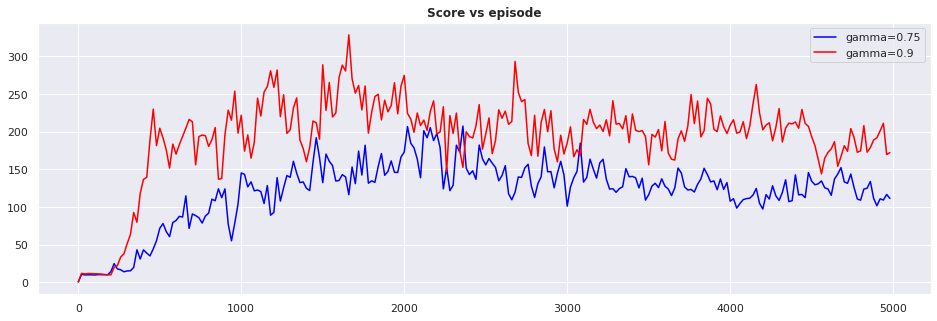

In [ ]:
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt # import matplotlib package
plt.figure(figsize=(16,5))
plt.plot(df_g075_int['episode'],df_g075_int['score'],color='blue',label='gamma=0.75')
plt.plot(df_g09_int['episode'],df_g09_int['score'],color='red',label='gamma=0.9')
plt.title('Score vs episode',fontsize=12,weight='bold')
plt.legend()
plt.show()

According the plot, the score of gamma of 0.9 curve is higher than the score of gamma of 0.75. This indicates model with higher gamma performs bettter than model with lower gamma. This trend is consistent throughout the whole interval of episodes.

-------------